<a href="https://colab.research.google.com/github/ujin2021/2021_DeepLearning/blob/master/CNN_tensorflow_china.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

# TensorFlow CNN API: tf.nn.conv2d

(2, 427, 640, 2)


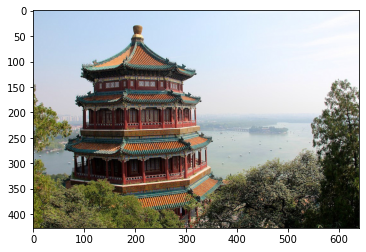

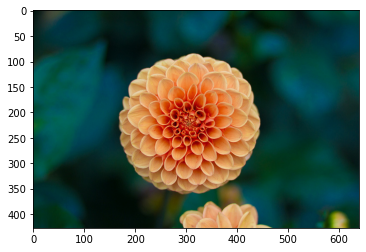

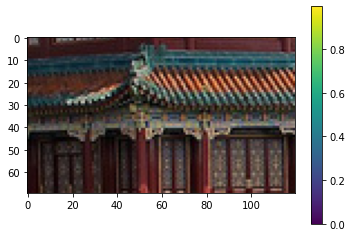

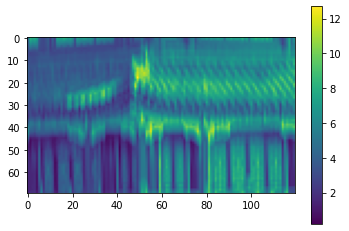

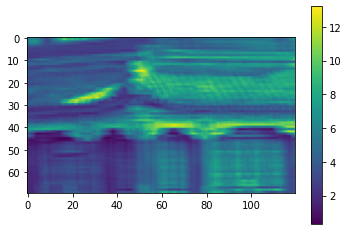

In [2]:
# Load sample images
china = load_sample_image("china.jpg") / 255 # 각 이미지는 3차원(RGB) [h, w, depth(channels)]
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower]) # mini-batch : [mini-batch_size, h, w, depth]
batch_size, height, width, channels = images.shape # (2, 427, 640, 3) => batch_size(2), height(427), width(640), channels(3)

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) # filter : (h, w, d, # of filter)
filters[:, 3, :, 0] = 1 # filter 0 - vertical line
filters[3, :, :, 1] = 1 # filter 1 - horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME") # filter통과 후 output의 depth는 2(# of filter 만큼)
print(outputs.shape) # (2, 427, 640, 2) => # of image(2), h(427), w(640), # of filter(2) => 흑백이미지

plt.imshow(images[0]) # china.jpg
plt.show()

plt.imshow(images[1]) # flower.jpg
plt.show()

# china image crop (RGB)
plt.imshow(images[0][150:220, 130:250]) # h(150:220) => 70, w(130:250) => 120
plt.colorbar()
plt.show()

# vertical filter in china crop image
plt.imshow(outputs[0, :, :, 0][150:220, 130:250]) # outputs[0, :, :, 0] 자체가 하나의 이미지(filter 적용한)
plt.colorbar()
plt.show()

# horizontal filter in china crop image
plt.imshow(outputs[0, :, :, 1][150:220, 130:250])
plt.colorbar()
plt.show()

## conv2d colormap

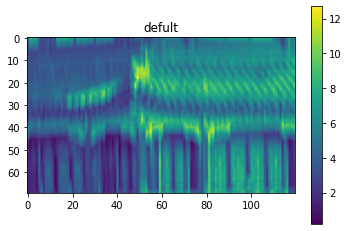

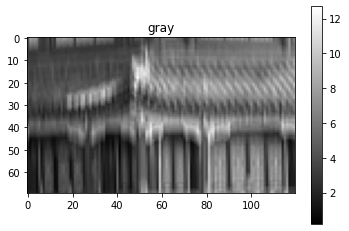

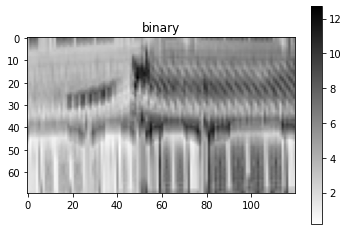

In [3]:
# filter 통과한 image에 colormap 적용해보기

# 1. default(viridis)
plt.imshow(outputs[0, :, :, 0][150:220, 130:250])
plt.title('defult')
plt.colorbar()
plt.show()

# 2. gray (흰색이 큰수, 검은색이 작은수)
plt.imshow(outputs[0, :, :, 0][150:220, 130:250], cmap='gray')
plt.title('gray')
plt.colorbar()
plt.show()

# 3. binary (검은색이 큰수, 흰색이 작은수)
plt.imshow(outputs[0, :, :, 0][150:220, 130:250], cmap='binary')
plt.title('binary')
plt.colorbar()
plt.show()

# TF Keras Max/Avg Pooling API

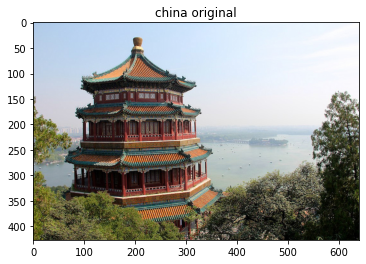

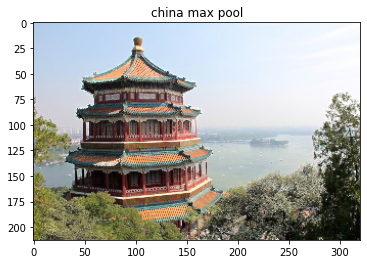

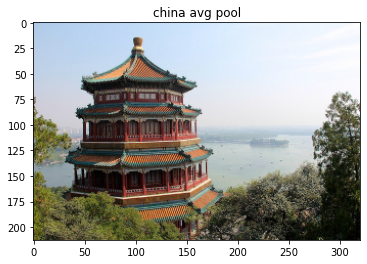

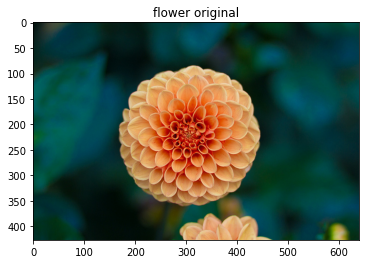

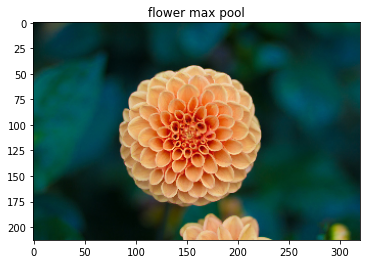

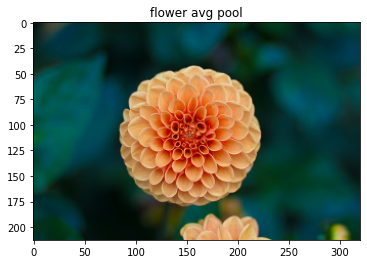

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

max_pool = keras.layers.MaxPool2D(pool_size=2) # 몇 배로 줄일 것인가(원본이미지의 1/2배)
avg_pool = keras.layers.AvgPool2D(pool_size=2)
max_output = max_pool(images)
avg_output = avg_pool(images)

# china.jpg
plt.imshow(images[0])
plt.title('china original')
plt.show()

# max pooling
plt.imshow(max_output[0]) # images index 0은 china
plt.title('china max pool')
plt.show()

# avg pooling
plt.imshow(avg_output[0]) # images index 0은 china
plt.title('china avg pool')
plt.show()

# flower.jpg
plt.imshow(images[1])
plt.title('flower original')
plt.show()

# max pooling
plt.imshow(max_output[1]) # images index 1은 china
plt.title('flower max pool')
plt.show()

# avg pooling
plt.imshow(avg_output[1]) # images index 1은 flower
plt.title('flower avg pool')
plt.show()